In [1]:
import sys
print(sys.executable)

C:\Users\Aquaregis32\.conda\envs\PyML32\python.exe


# Diabetes detection

### Libraries

In [2]:
## Basics
import numpy as np
import pandas as pd

# String manipulation
import re

import warnings

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset
from sklearn import datasets

## scikit-learn packages
# Modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score

# Evaluating
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

## Setup
warnings.filterwarnings('ignore') 
%matplotlib inline
%autosave 10

Autosaving every 10 seconds


### Data

In [3]:
br_cancer = datasets.load_breast_cancer()
print(type(br_cancer))
print("\n")
print(br_cancer.keys())

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [4]:
print(br_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
X = pd.DataFrame(br_cancer.data, columns = br_cancer.feature_names)
print(X.shape)
X.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
y = pd.DataFrame(br_cancer.target, columns = ["positive"])
y.head()

,positive
0,0
1,0
2,0
3,0
4,0


Correcting column names of the dataset

In [7]:
X.columns = X.columns.str.replace("\s+","_", regex = True)
X.iloc[:5,:8].head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430


## Modelling

#### KNN classifier

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=193, stratify = y)

Identifying the best value of K for the KNN classifier

In [9]:
scores = {}
k_range = range(1,26)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = accuracy_score(y_test,y_pred)
scores_values = [x for x in scores.values()]

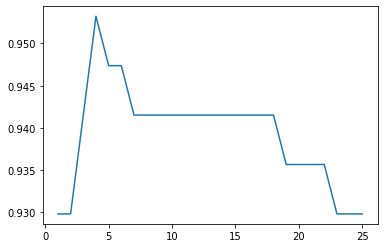

In [10]:
plt.clf()
plt.plot(k_range,scores_values)

Using K = 6

In [11]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [12]:
y_pred = knn.predict(X_test)

In [13]:
score = accuracy_score(y_test,y_pred)
print("Accuracy of model: {}%".format(round(score*100,2)))

Accuracy of model: 94.74%


In [14]:
print(confusion_matrix(y_pred, y_test))

[[ 57   2]
 [  7 105]]


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        64
           1       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



#### Logistic Classsifier

In [16]:
logreg = LogisticRegression()

In [17]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = logreg.predict(X_test)

In [19]:
score = accuracy_score(y_test,y_pred)
print("Accuracy of model: {}%".format(round(score*100,2)))

Accuracy of model: 95.32%


In [20]:
print(confusion_matrix(y_pred, y_test))

[[ 57   1]
 [  7 106]]


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        64
           1       0.94      0.99      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



In [22]:
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr,tpr, thresh = roc_curve(y_test, y_pred_prob)

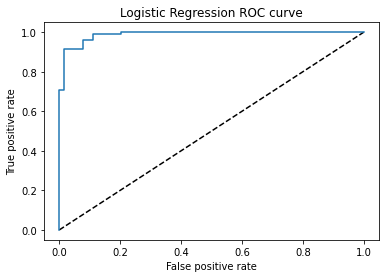

In [23]:
plt.clf()
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = "Logistic Regression")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Logistic Regression ROC curve")
plt.show()